<a href="https://colab.research.google.com/github/AFLLAMA/pycongliwice/blob/main/Pycon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Text(0.5, 1.0, 'Line Chart')

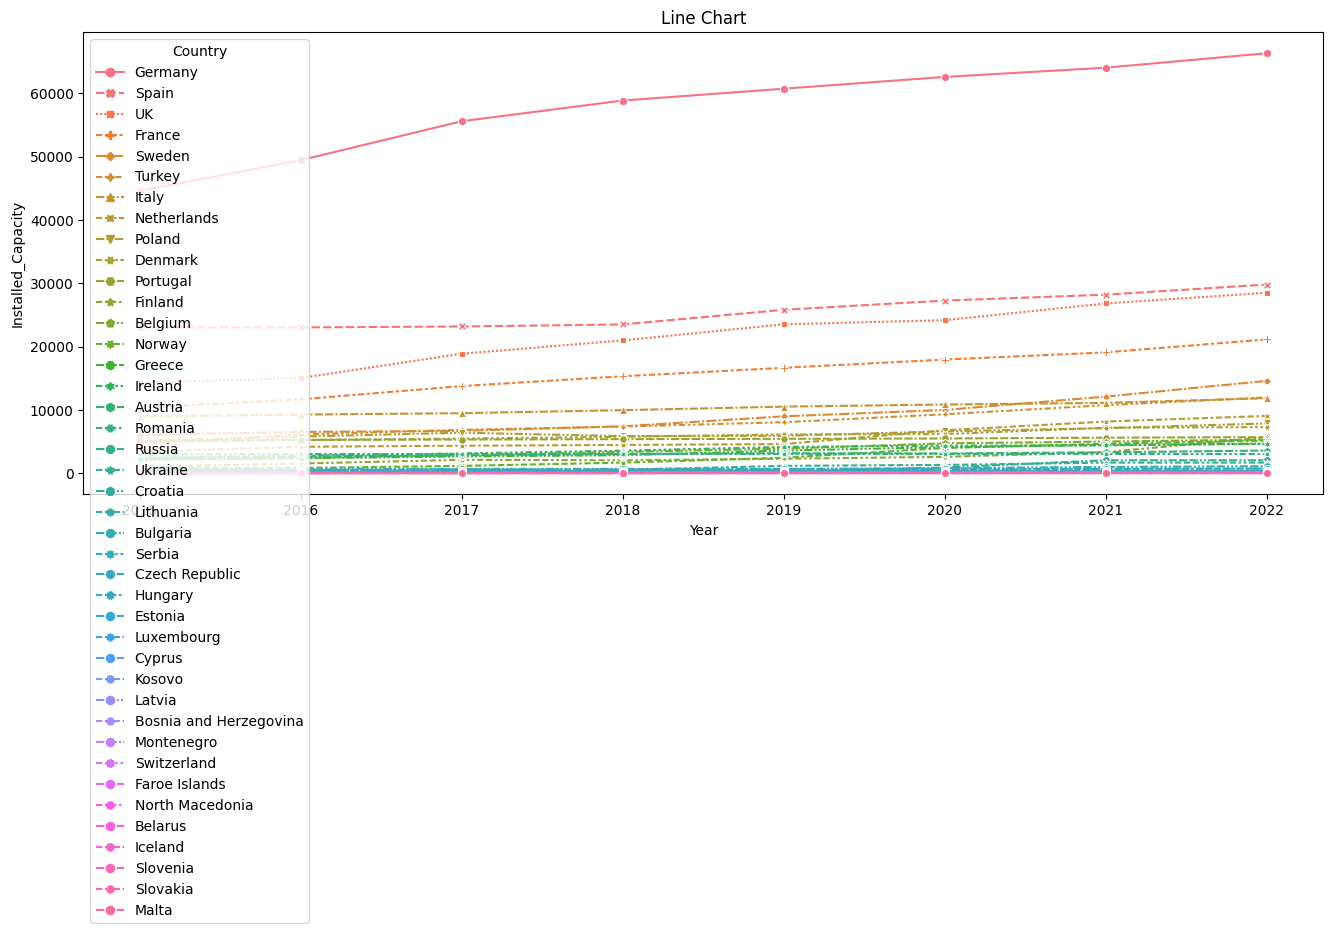

In [29]:

#LINECHART

#Lets create a line chart step by step

# Path of the file to read
WindData_filepath = "/content/Wind_Power.xlsx"



# Read the file into a variable
WindData = pd.read_excel(WindData_filepath)
WindData = pd.read_excel(WindData_filepath, sheet_name='Transformed')
# Print the data
# Print(WindData)

# Print the first 5 rows of the data
WindData.head()



# Set the width and height of the figure
plt.figure(figsize=(16,6))


# Create the line chart with categorical data
sns.lineplot(data=WindData, x='Year', y='Installed_Capacity', hue='Country', style='Country', markers = True)


plt.xlabel('Year')
plt.ylabel('Installed_Capacity')
plt.title('Line Chart')



Text(0.5, 1.0, 'Installed Wind Power in Germany, Spain & UK')

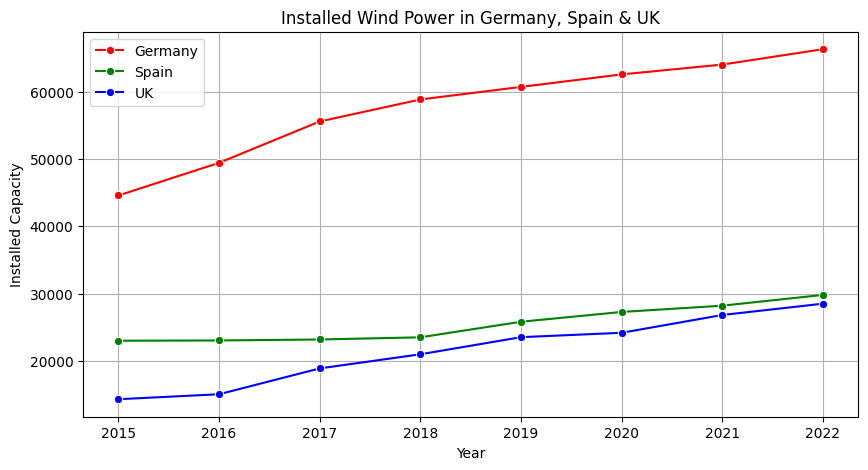

In [30]:
#Lets apply some filters now

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Try to select only three / four countries & check the visual
# Apply filters to the data
filtered_data1 = WindData[(WindData['Country'] == 'Germany')]
filtered_data2 = WindData[(WindData['Country'] == 'Spain')]
filtered_data3 = WindData[(WindData['Country'] == 'UK')]

# Create the line chart with categorical data
sns.lineplot(data=filtered_data1, x='Year', y='Installed_Capacity', color = 'red',label='Germany', marker='o')
sns.lineplot(data=filtered_data2, x='Year', y='Installed_Capacity', color = 'green', label='Spain', marker='o')
sns.lineplot(data=filtered_data3, x='Year', y='Installed_Capacity', color = 'blue',  label='UK', marker='o')

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Wind Power in Germany, Spain & UK')


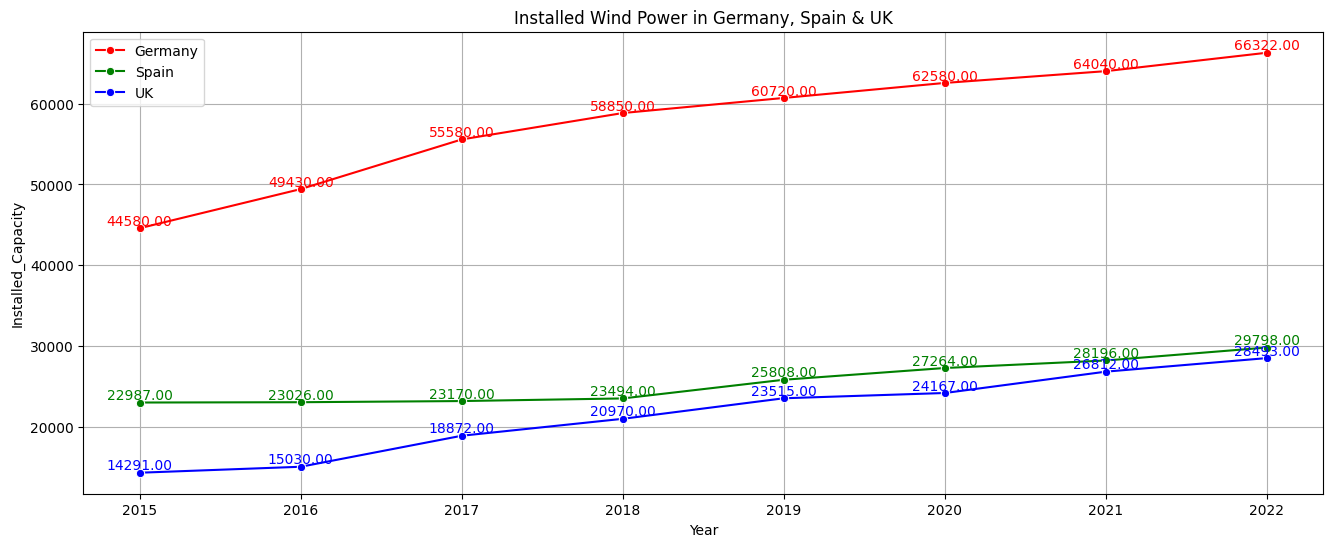

In [31]:
# Lets make it more fun by adding text labels on line chart

# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Apply filters to the data
filtered_data1 = WindData[(WindData['Country'] == 'Germany')]
filtered_data2 = WindData[(WindData['Country'] == 'Spain')]
filtered_data3 = WindData[(WindData['Country'] == 'UK')]

# Create the line chart with categorical data
sns.lineplot(data=filtered_data1, x='Year', y='Installed_Capacity', color = 'red',label='Germany', marker='o')
sns.lineplot(data=filtered_data2, x='Year', y='Installed_Capacity', color = 'green', label='Spain', marker='o')
sns.lineplot(data=filtered_data3, x='Year', y='Installed_Capacity', color = 'blue',  label='UK', marker='o')

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed_Capacity')
plt.title('Installed Wind Power in Germany, Spain & UK')


# Add number labels on lines
for line in plt.gca().lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for i, (x, y) in enumerate(zip(xdata, ydata)):
        plt.text(x, y, f'{y:.2f}', color=line.get_color(), ha='center', va='bottom')


  #Excercise ->  Lets filter trend for one country

Text(0.5, 1.0, 'Installed Wind Power in Germany')

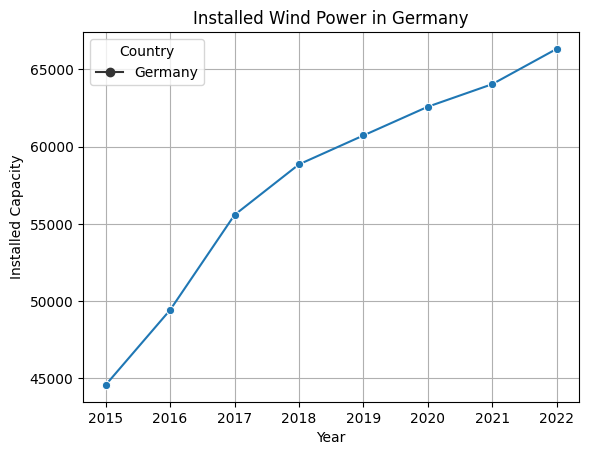

In [32]:
#Now lets filter trend for Germany
#To filter the top N values in a line chart using Seaborn, you can use pandas to sort the data based on a specific column and then select the top N rows for plotting.

filtered_data = WindData[(WindData['Country'] == 'Germany')]


sorted_data = filtered_data.sort_values(by='Year', ascending=False)


#Print filtered_data
# print(filtered_data)

# Create the line chart with categorical data
sns.lineplot(data=filtered_data, x='Year', y='Installed_Capacity',  style='Country', markers = True)
plt.grid(True)

plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Wind Power in Germany')


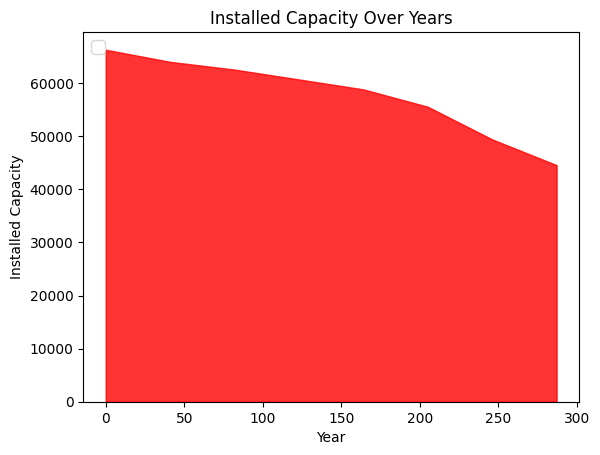

In [33]:
#Lets Convert this Line Chart to an Area Chart
#We will now be using Matplotlib


#Apply  filters now
filtered_data = WindData[(WindData['Country'] == 'Germany')]

sorted_data = filtered_data.sort_values(by='Year', ascending=False)

#Plotting Area Chart using Sorted Data For Germany
plt.stackplot(sorted_data.index, [sorted_data['Installed_Capacity']], alpha=.8, color='red')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity Over Years')

plt.legend(loc=2, fontsize='large')
plt.show()




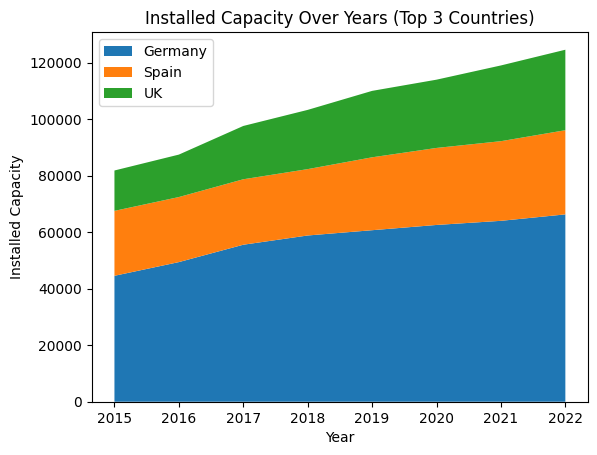

In [34]:
#plotting stacked Area Chart with multiple countries

# Pivot the data to have 'Year' as the index, 'Country' as columns, and 'Installed Capacity' as values
pivot_data = WindData.pivot(index='Year', columns='Country', values='Installed_Capacity')

# Get the top 3 countries by installed capacity
top_countries = pivot_data.sum().nlargest(3).index

# Filter the pivot data for the top 3 countries
pivot_data_top = pivot_data[top_countries]

# Generate the area plot
plt.stackplot(pivot_data_top.index, pivot_data_top.values.T, labels=pivot_data_top.columns)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity Over Years (Top 3 Countries)')

# Add legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


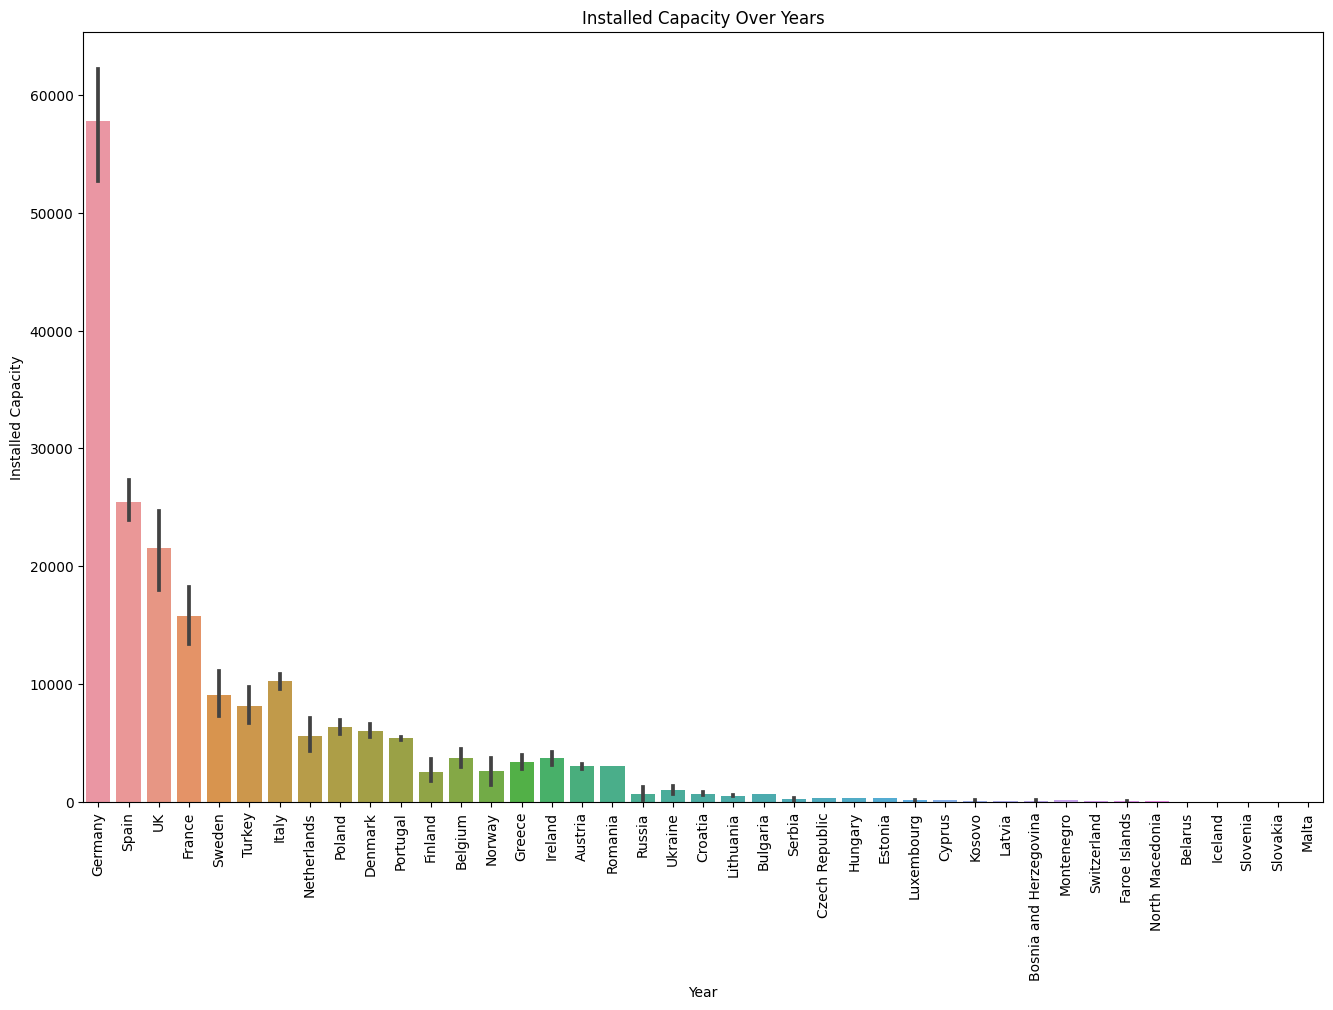

In [35]:
#BAR CHART

#Lets move to bar charts

# Pivot the data to have 'Year' as the index, 'Country' as columns, and 'Installed Capacity' as values
#pivot_data = WindData.pivot(index='Year', columns='Country', values='Installed_Capacity')
#pivot_data.head()

# Set the width and height of the figure
plt.figure(figsize=(16,10))
WindData.head()

# Generate the bar plot
sns.barplot(data=WindData, x='Country', y='Installed_Capacity')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity Over Years')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


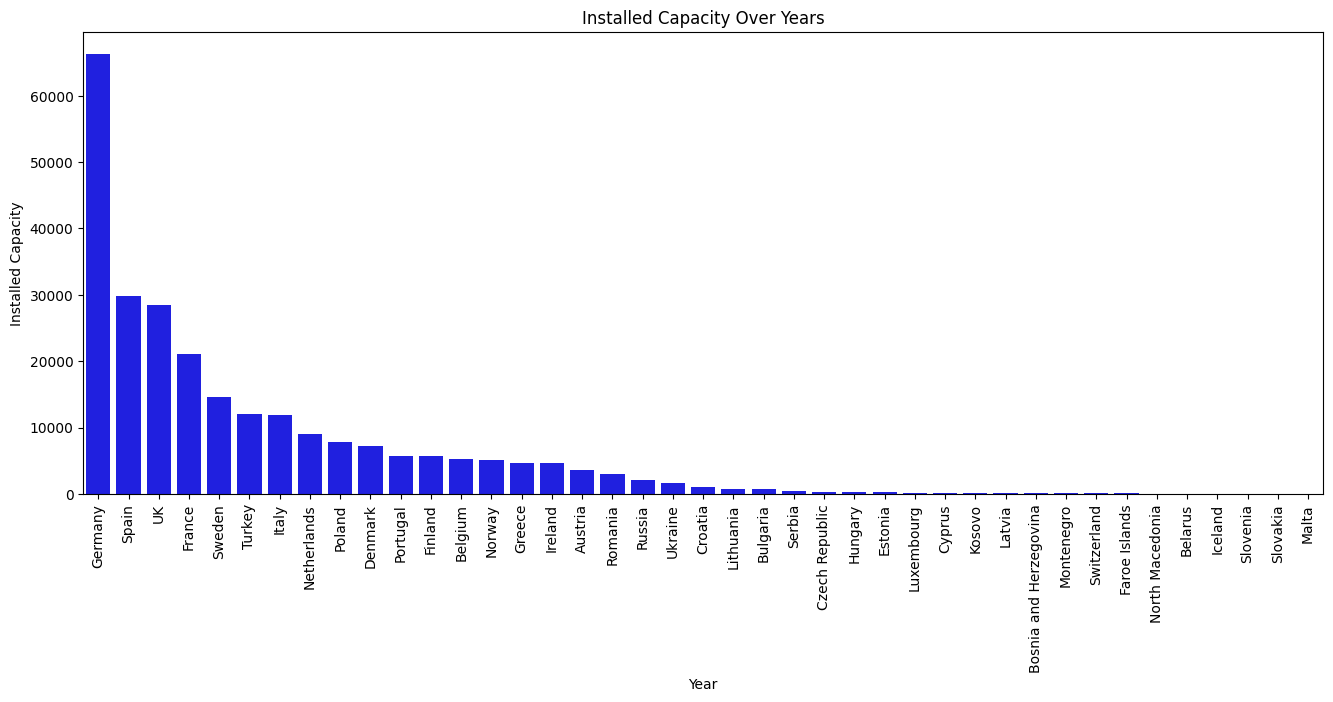

In [36]:
# Above Chart is showing data without any filter
# Lets filter only 2022 & then check the plot

# Set the width and height of the figure
plt.figure(figsize=(16,6))

filtered_data = WindData[(WindData['Year'] == 2022)]
filtered_data.head()

# Generate the bar plot
sns.barplot(data=filtered_data, x='Country', y='Installed_Capacity',color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity Over Years')



# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


#Can someone change it to Horizontal Bar Chart ?

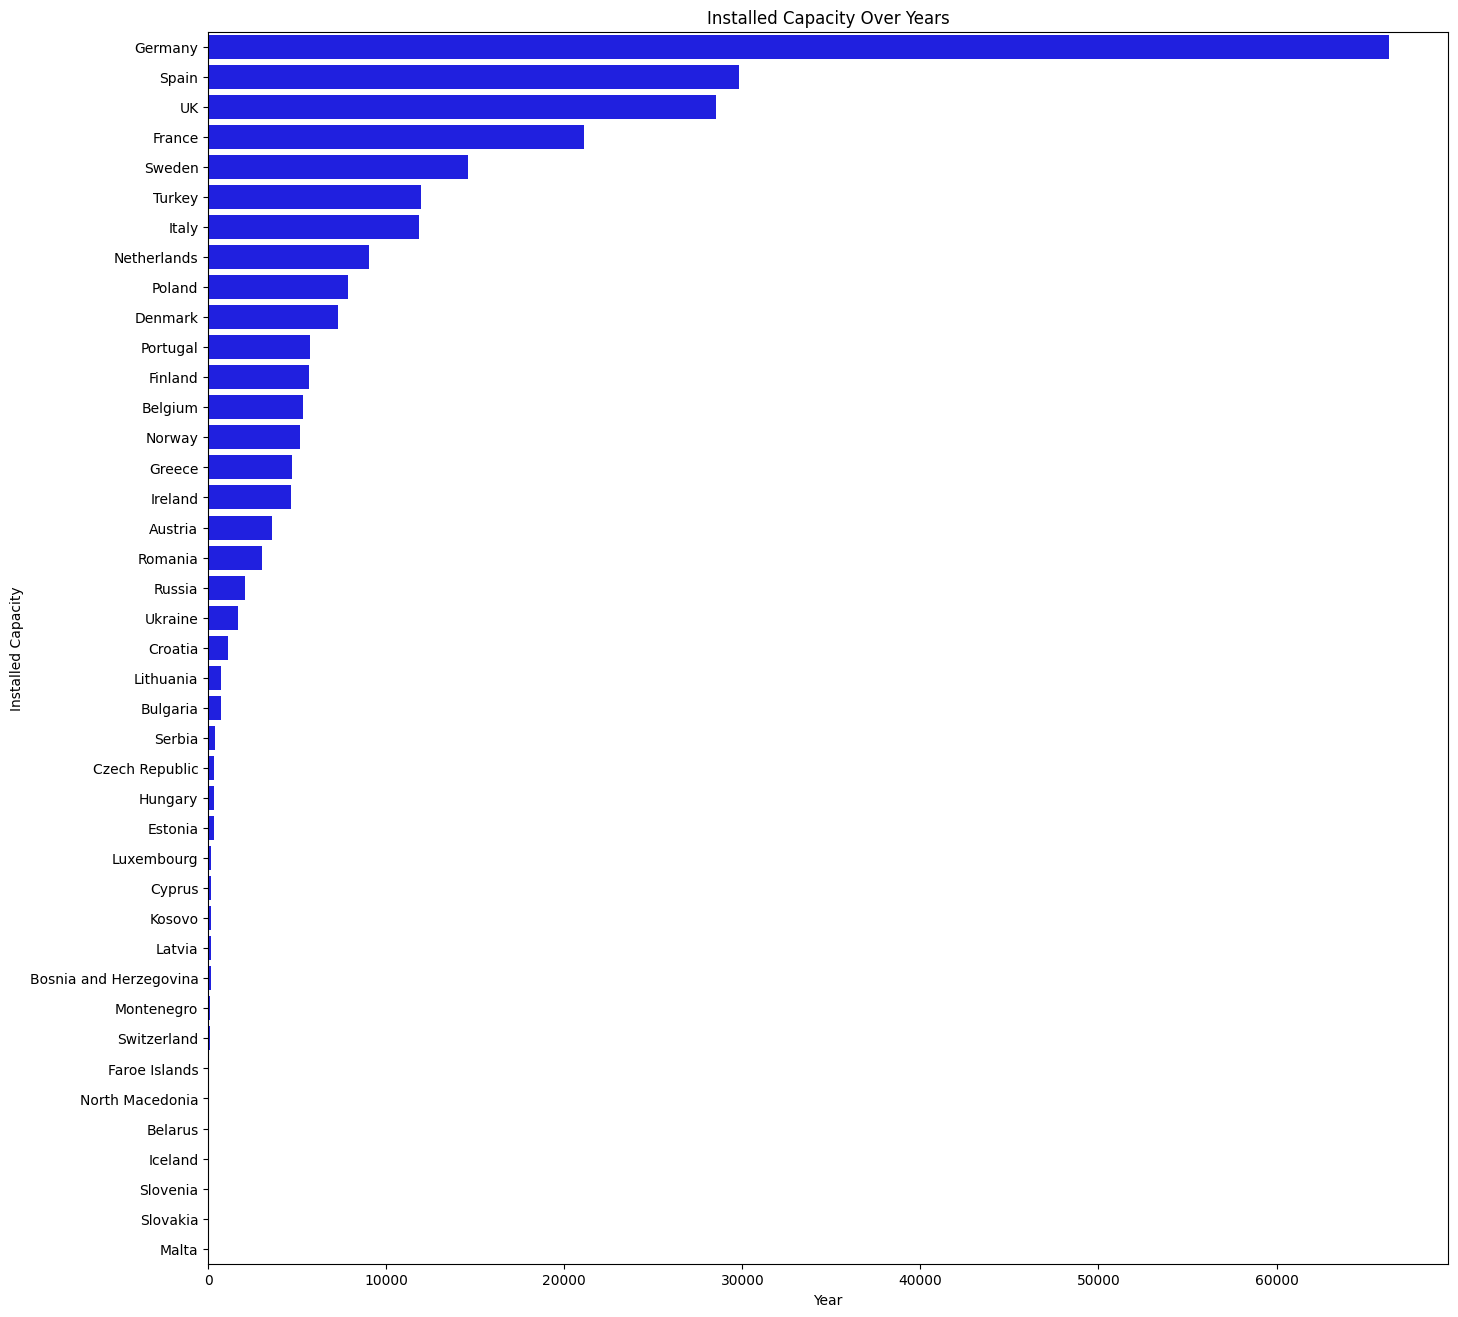

In [37]:
#Change it to Horizontal Bar Chart


plt.figure(figsize=(16,16))

filtered_data = WindData[(WindData['Year'] == 2022)]
filtered_data.head()

# Generate the bar plot
sns.barplot(data=filtered_data , y='Country', x='Installed_Capacity',color='blue')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed Capacity')
plt.title('Installed Capacity Over Years')



# Display the plot
plt.show()

<Figure size 1600x1600 with 0 Axes>

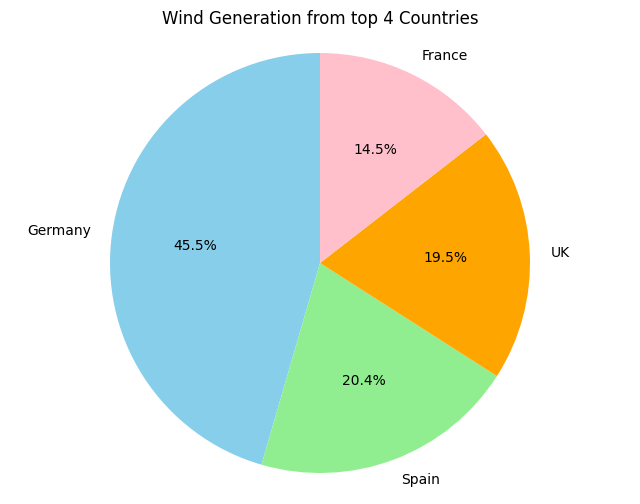

In [38]:
#Pie Chart


plt.figure(figsize=(16,16))

filtered_data = WindData[(WindData['Year'] == 2022)]


# Group the data by country and calculate the sum of installed capacity
grouped_data = filtered_data.groupby('Country')['Installed_Capacity'].sum().reset_index()

# Sort the data by the installed capacity in descending order
sorted_data = grouped_data.sort_values('Installed_Capacity', ascending=False)

# Select the top 4 countries
top_countries = sorted_data['Country'].head(4).tolist()
top_capacity = sorted_data['Installed_Capacity'].head(4).tolist()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_capacity, labels=top_countries, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Wind Generation from top 4 Countries')

# Set the aspect ratio to be equal so that the pie is circular
plt.axis('equal')

# Show the plot
plt.show()



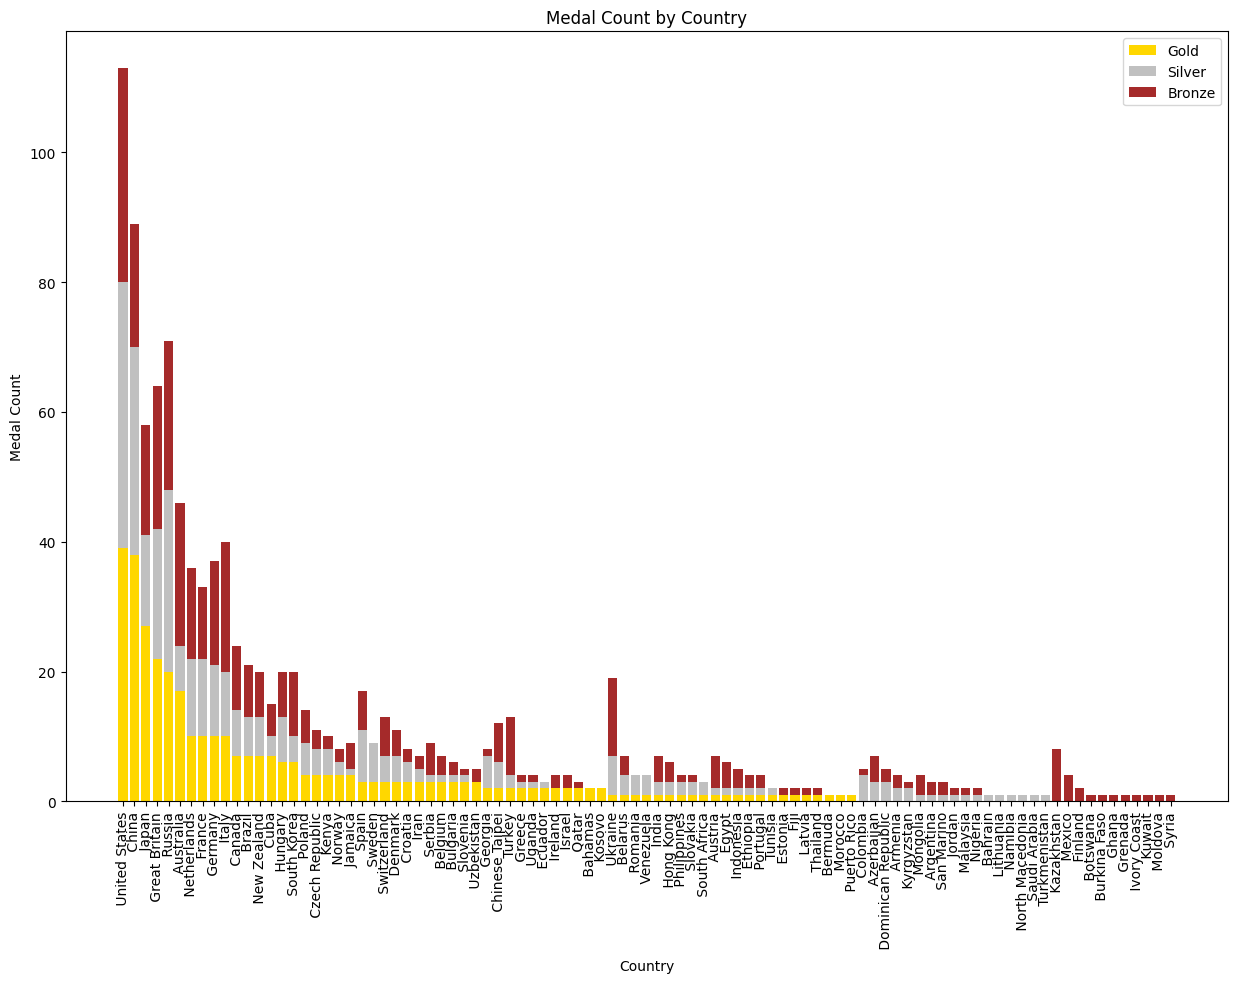

In [39]:
#Stacked Bar Chart

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from Excel file
data = pd.read_excel('/content/2020_Olympics_Medal.xlsx')

data.head()

# Set the figure size
plt.figure(figsize=(15, 10))

# Set the bar width
# bar_width = 1

# Get the data for Gold, Silver, and Bronze
gold_data = data['Gold']
silver_data = data['Silver']
bronze_data = data['Bronze']

# Get the country names
countries = data['Country']

# Create the bars for Gold, Silver, and Bronze
plt.bar(countries, gold_data,  label='Gold', color='gold')
plt.bar(countries, silver_data, bottom=gold_data, label='Silver', color='silver')
plt.bar(countries, bronze_data,  bottom=gold_data+silver_data, label='Bronze', color='brown')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medal Count by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()


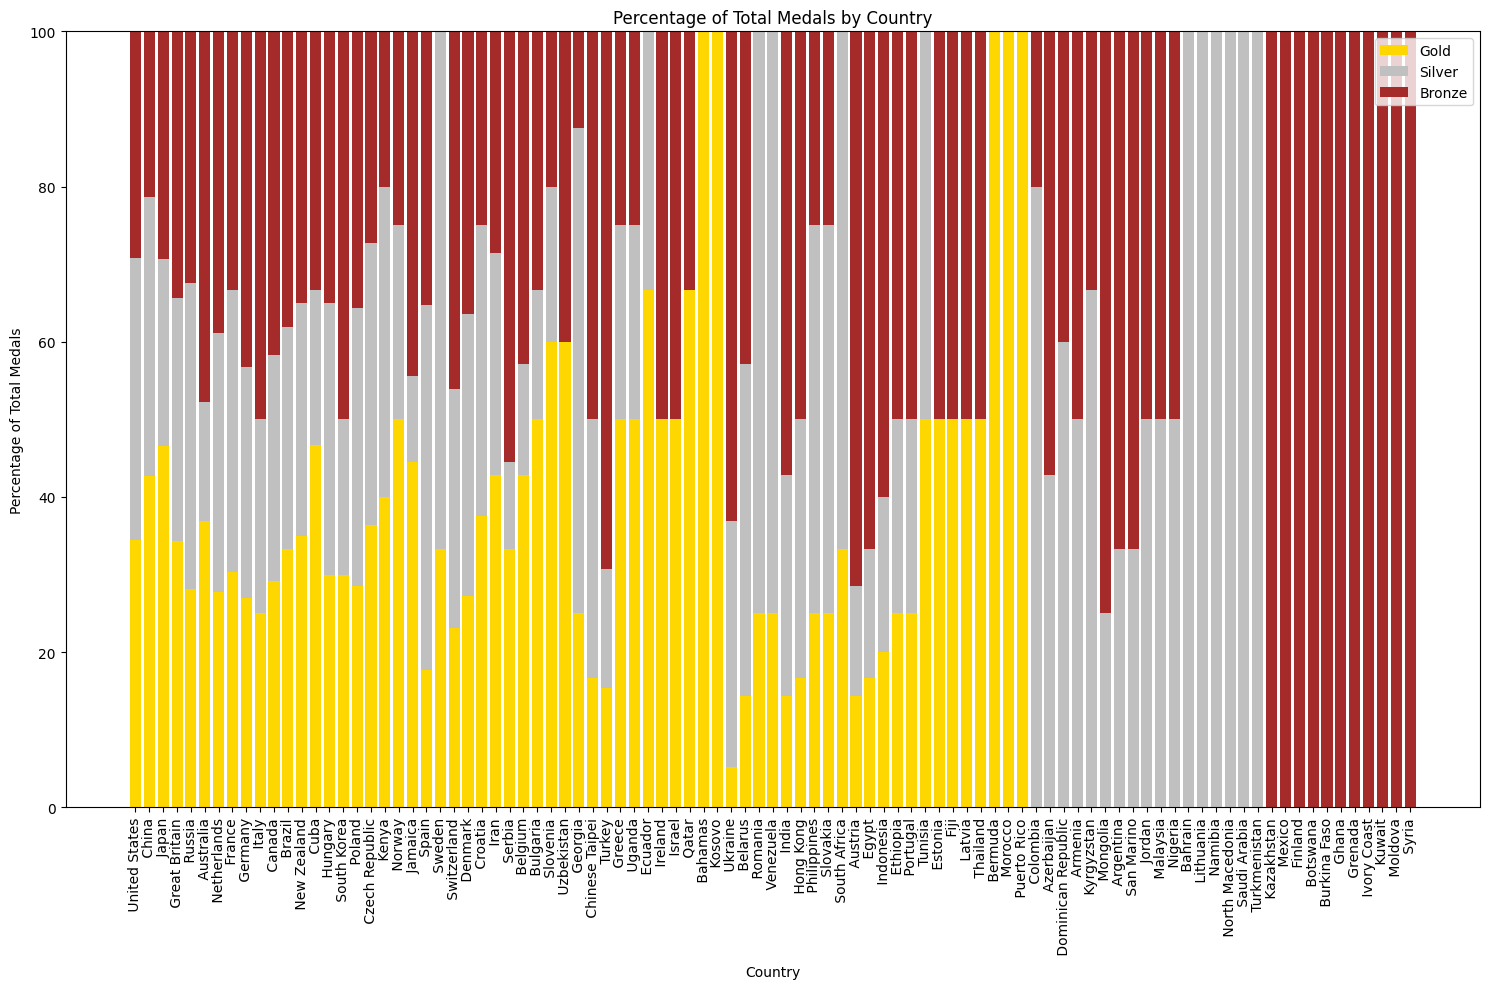

In [40]:
#lets change it to %age of total & improve spacing between bars

# Calculate the total medals for each country
data['Total'] = data['Gold'] + data['Silver'] + data['Bronze']

# Calculate the percentage of total medals for each category
data['Gold %'] = data['Gold'] / data['Total'] * 100
data['Silver %'] = data['Silver'] / data['Total'] * 100
data['Bronze %'] = data['Bronze'] / data['Total'] * 100

# Set the figure size
plt.figure(figsize=(15, 10))


# Get the data for Gold, Silver, and Bronze percentages
gold_data = data['Gold %']
silver_data = data['Silver %']
bronze_data = data['Bronze %']

# Get the country names
countries = data['Country']

# Create the bars for Gold, Silver, and Bronze percentages
plt.bar(countries, gold_data,  label='Gold', color='gold')
plt.bar(countries, silver_data, bottom=gold_data, label='Silver', color='silver')
plt.bar(countries, bronze_data,  bottom=gold_data+silver_data, label='Bronze', color='brown')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Percentage of Total Medals')
plt.title('Percentage of Total Medals by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Improve spacing between the bars
plt.tight_layout()

# Show the plot
plt.show()

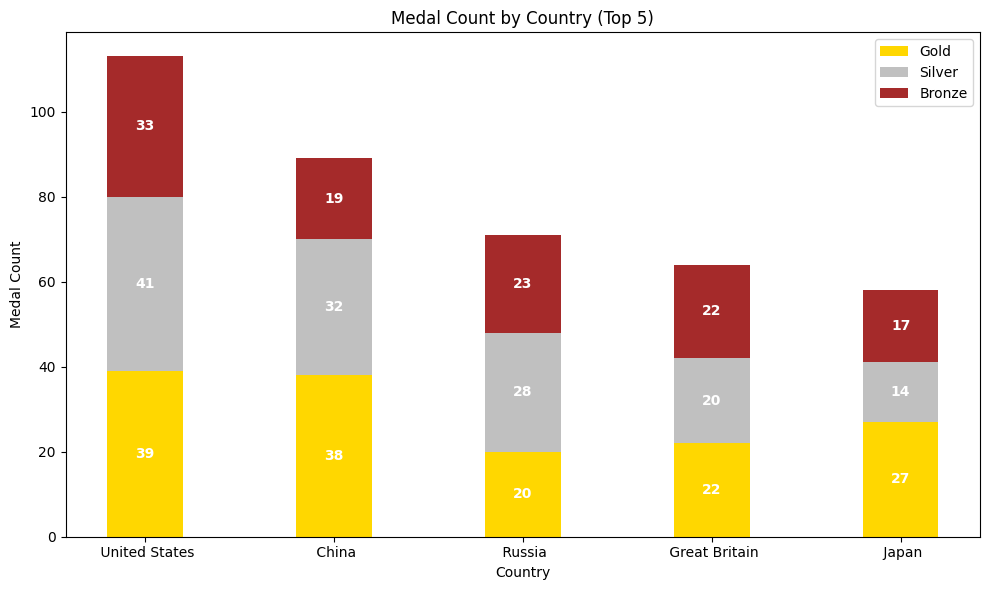

In [41]:
#top 5 countries by medal count

# Calculate the total medals for each country
data['Total'] = data['Gold'] + data['Silver'] + data['Bronze']

# Sort the data by total medals in descending order
data = data.sort_values('Total', ascending=False)

# Select the top 5 countries
top_countries = data.head(5)

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.4

# Get the data for Gold, Silver, and Bronze medals
gold_data = top_countries['Gold']
silver_data = top_countries['Silver']
bronze_data = top_countries['Bronze']

# Get the country names
countries = top_countries['Country']

# Create the stacked bars for Gold, Silver, and Bronze medals
plt.bar(countries, gold_data, width=bar_width, label='Gold', color='gold')
plt.bar(countries, silver_data, width=bar_width, bottom=gold_data, label='Silver', color='silver')
plt.bar(countries, bronze_data, width=bar_width, bottom=gold_data+silver_data, label='Bronze', color='brown')

# Add labels to the bars
for country, gold, silver, bronze in zip(countries, gold_data, silver_data, bronze_data):
    plt.text(country, gold/2, str(gold), ha='center', va='center', color='white', fontweight='bold')
    plt.text(country, gold + silver/2, str(silver), ha='center', va='center', color='white', fontweight='bold')
    plt.text(country, gold + silver + bronze/2, str(bronze), ha='center', va='center', color='white', fontweight='bold')


# Add labels and title
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medal Count by Country (Top 5)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

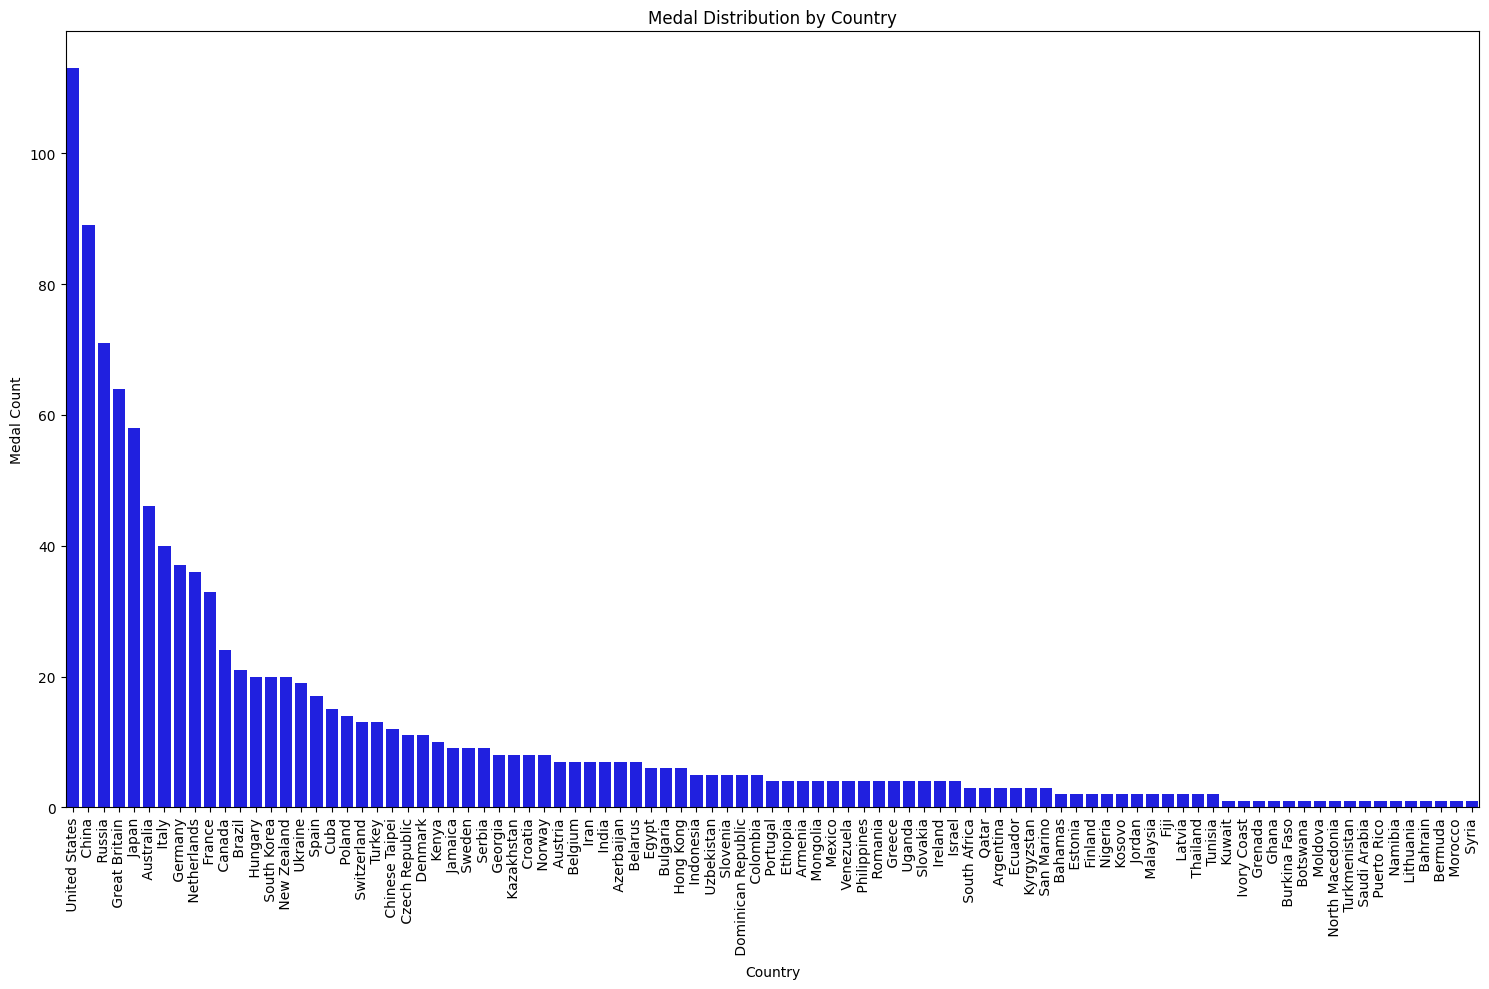

In [42]:
#Histogram


# Calculate the total medals for each country
data['Total'] = data['Gold'] + data['Silver'] + data['Bronze']

# Set the figure size
plt.figure(figsize=(15, 10))

# Generate the bar plot
sns.barplot(data=data, x='Country', y='Total',color='blue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.title('Medal Distribution by Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

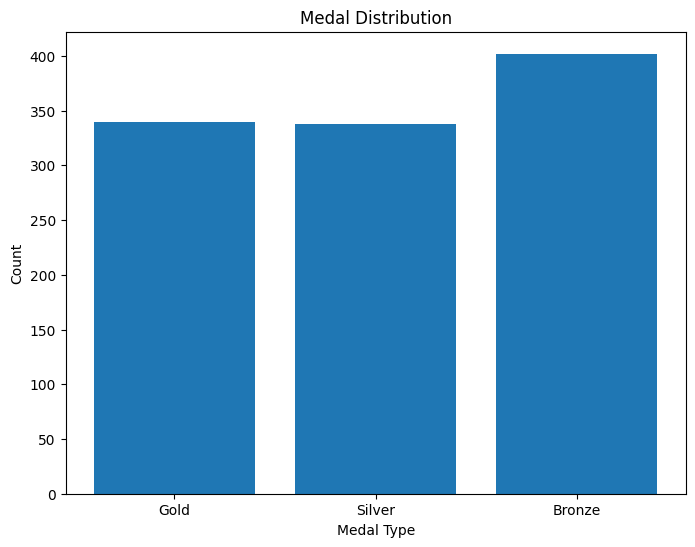

In [43]:
#create a histogram to explore the distribution of medals across different types, such as gold, silver, and bronze. Each medal type would be a
#category on the x-axis, and the height of each bar represents the count or frequency of medals of that type


# Count the number of medals by type
medal_counts = data[['Gold', 'Silver', 'Bronze']].sum()

# Set the figure size
plt.figure(figsize=(8, 6))

# Define the medal types and their corresponding counts
medal_types = ['Gold', 'Silver', 'Bronze']
counts = medal_counts.values

# Plot the histogram
plt.bar(medal_types, counts)

# Add labels and title
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.title('Medal Distribution')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

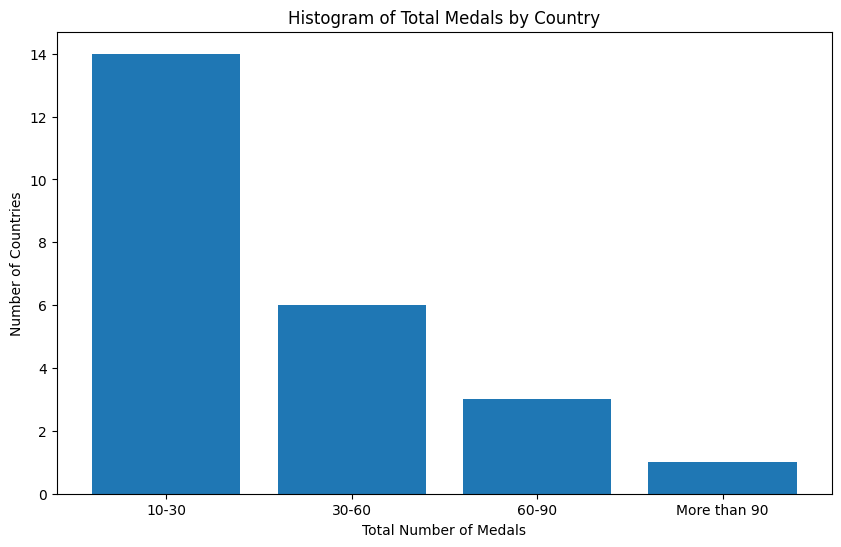

In [44]:
# Group the data by total number of medals and count the number of countries
medal_counts = data.groupby(pd.cut(data['Total'], bins=[10, 30, 60, 90, float('inf')]))['Country'].nunique()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the bin edges and labels
bin_edges = [10, 30, 60, 90, float('inf')]
bin_labels = ['10-30', '30-60', '60-90', 'More than 90']

# Group the data by total number of medals and count the number of countries
medal_counts = data.groupby(pd.cut(data['Total'], bins=bin_edges, labels=bin_labels))['Country'].nunique()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(medal_counts.index, medal_counts.values)

# Add labels and title
plt.xlabel('Total Number of Medals')
plt.ylabel('Number of Countries')
plt.title('Histogram of Total Medals by Country')

# Show the plot
plt.show()

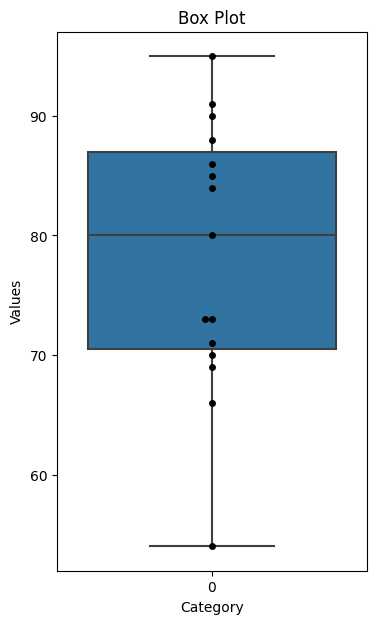

In [45]:
#Box & Whisker

import seaborn as sns

# Set the figure size
plt.figure(figsize=(4, 7))

# Sample data

data = [54 , 66,  69 , 70 , 71 , 73  ,73  ,80 , 84 , 85  ,86 , 88 , 90,  91,  95]

# Create a box plot using seaborn
sns.boxplot(data=data)

# Add markers on the box plot
sns.swarmplot(data=data, color='black')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Box Plot')


# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


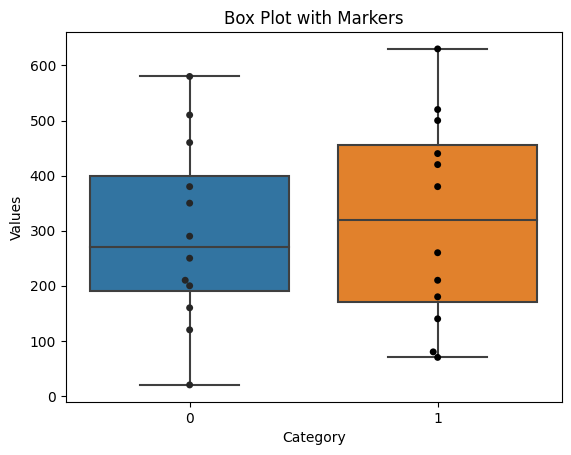

In [46]:
# Now can some one try box plot with two categories ? Lets say sales from store 1 & store 2

import seaborn as sns

# Sample data
category_1 = [350, 460, 20, 160, 580, 250, 210, 120, 200, 510, 290, 380]
category_2 = [520, 180, 260, 380, 80, 500, 630, 420, 210, 70, 440, 140]

# Combine the data into a single list
data = [category_1, category_2]

# Create a box plot using seaborn
sns.boxplot(data=data)

# Add markers on the box plot
sns.swarmplot(data=data, color='black')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Box Plot with Markers')

# Show the plot
plt.show()





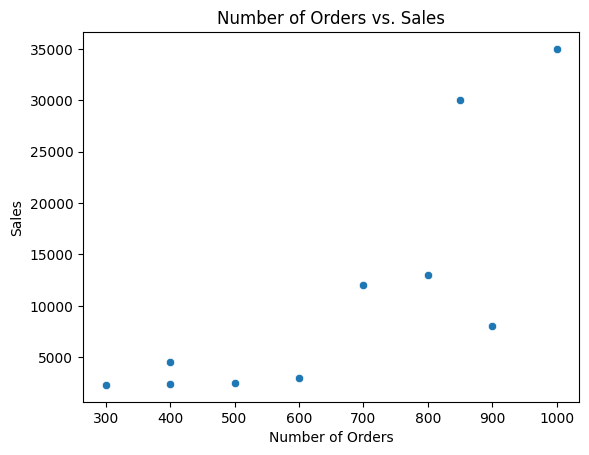

In [47]:
#Scatter Plot

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from Excel file
data = pd.read_excel('/content/Scatter_Plot.xlsx')


# Extract the columns of interest
orders = data['Number of Orders']
sales = data['Sales']

# Create a scatter plot
sns.scatterplot(x=orders, y=sales)

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.title('Number of Orders vs. Sales')

# Show the plot
plt.show()